## Dataset Cleaning

### Importing necessary libraries and loading the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 100)
plt.style.use('ggplot')

from ydata_profiling import ProfileReport

In [2]:
data = pd.read_csv('Zomoto.CSV')

In [3]:
data.head(20)

,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2/5,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City
1,43422,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6 /5,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,"1,700","[('Rated 1.0', 'RATED\n Expected a good night...",[],Dine-out,MG Road
2,16032,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7/5,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",[],Delivery,HSR
3,51635,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",Thai & Chinese Fast Food,No,No,3.4 /5,7,+91 9206260085\n+91 7619416923,KR Puram,Quick Bites,NaN,"Chinese, Thai",400,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
4,23424,https://www.zomato.com/bangalore/grill-on-whee...,"Kothanuru Main Road, Puttenahalli Road, Natara...",Grill On Wheels,No,No,NEW,0,+91 9901979901,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400,[],[],Dine-out,JP Nagar
5,15103,https://www.zomato.com/bangalore/patisserie-ni...,"12, 2nd Cross, Hutchins Road, Off Davis Road, ...",Patisserie Nitash,No,No,4.2/5,142,+91 9845427364,Frazer Town,Bakery,"Patisserie Nitash, Brownie, Chocolate Cake, Ch...",Bakery,500,"[('Rated 5.0', ""RATED\n What if I told you th...",[],Delivery,Frazer Town
6,10096,https://www.zomato.com/bangalore/cake-n-cookie...,"12, 3rd Floor, 15th Main 17th Cross, Rose Gard...",Cake N Cookies,No,No,NaN,0,+91 9845155844\r\n+91 9845387783,JP Nagar,Bakery,NaN,Bakery,350,[],[],Delivery,BTM
7,35354,https://www.zomato.com/bangalore/bombay-talkie...,"10A 38th Cross Road 5th Block, Jayanagar, Bang...",Bombay Talkies,Yes,No,3.6 /5,24,+91 8148655880,Jayanagar,Quick Bites,NaN,"Maharashtrian, Fast Food, Street Food, Sandwich",200,"[('Rated 2.0', 'RATED\n Visited this place to...","['Paneer Tikka Frankie', 'Misal Pav', 'Aloo Pa...",Delivery,Koramangala 7th Block
8,29058,https://www.zomato.com/bangalore/cafe-58-btm-b...,"5, 1st Main Road, Buvannapa Layout, Kaveri Lay...",Cafe 58,No,No,3.4 /5,4,+91 9846467567,BTM,Quick Bites,NaN,"Fast Food, Biryani",200,"[('Rated 4.0', 'RATED\n Small mallu managed c...",[],Dine-out,Koramangala 4th Block
9,32593,https://www.zomato.com/bangalore/shagun-sweets...,"294, 7th Main, 7th Cross, BTM 2nd Stage, BTM, ...",Shagun Sweets & Foods,Yes,No,3.5 /5,221,080 42277117\r\n+91 9108457117,BTM,"Sweet Shop, Quick Bites","Chaat, Chole Bhature, Raj Kachori, Thali, Rasm...","Mithai, North Indian, Street Food, Chinese",400,"[('Rated 3.0', 'RATED\n Good place to try out...","['Pav Bhaji', 'Aloo Tikki Chaat', 'Special Tha...",Delivery,Koramangala 6th Block


In [4]:
data.columns = ['ID','URL', 'Address', 'Name', 'Online_Order', 'Book_Table','Rating', 'Number_of_votes', 'Phone_Number', 'Location', 'Rest_Type', 'dish_liked','Cuisines', 'Approx_Cost(for two people)', 'Reviews_List', 'menu_item','listed_in(type)', 'listed_in(city)']

In [5]:
data.columns

Index(['ID', 'URL', 'Address', 'Name', 'Online_Order', 'Book_Table', 'Rating',
       'Number_of_votes', 'Phone_Number', 'Location', 'Rest_Type',
       'dish_liked', 'Cuisines', 'Approx_Cost(for two people)', 'Reviews_List',
       'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
data.shape

(10000, 18)

#### There are exactly 10,000 records in the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           10000 non-null  int64 
 1   URL                          10000 non-null  object
 2   Address                      10000 non-null  object
 3   Name                         10000 non-null  object
 4   Online_Order                 10000 non-null  object
 5   Book_Table                   10000 non-null  object
 6   Rating                       8528 non-null   object
 7   Number_of_votes              10000 non-null  int64 
 8   Phone_Number                 9764 non-null   object
 9   Location                     9997 non-null   object
 10  Rest_Type                    9953 non-null   object
 11  dish_liked                   4642 non-null   object
 12  Cuisines                     9995 non-null   object
 13  Approx_Cost(for two people)  994

---

### Going through each feature present in dataset

### 1st column - ID

#### Checking for duplicate records

In [8]:
data['ID'].duplicated().sum()

909

In [9]:
data[data['ID'].duplicated() == True]

,ID,URL,Address,Name,Online_Order,Book_Table,Rating,Number_of_votes,Phone_Number,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),Reviews_List,menu_item,listed_in(type),listed_in(city)
302,28991,https://www.zomato.com/bangalore/davanagere-be...,"1131/1, 17th Cross, 7th Sector HSR, Bangalore",Davanagere Benne Dose,Yes,No,3.9 /5,106,+91 9916751528,HSR,Quick Bites,Benne Dosa,South Indian,150,"[('Rated 3.0', ""RATED\n I tried Davangere Ben...",[],Dine-out,Koramangala 4th Block
429,36768,https://www.zomato.com/bangalore/naati-manae-k...,"462, 1st Floor, 17th C Main Road, 2nd Cross, K...",Naati Manae,Yes,Yes,3.9 /5,484,080 41116661\n080 41136661,Koramangala 5th Block,Casual Dining,"Chicken Chettinad, Donne Biryani, Chicken Gunt...","North Indian, South Indian, Chinese, Biryani",700,"[('Rated 4.0', ""RATED\n I have had donne biry...","['Mutton Chops', 'Nammura Vuta [Quick Meal Lim...",Dine-out,Koramangala 7th Block
513,17749,https://www.zomato.com/bangalore/keto-kitchen-...,"32, 80 Feet Road, Opposite Axis Bank, HAL 3rd ...",Keto Kitchen,Yes,No,3.1/5,18,080 45128817,Indiranagar,Casual Dining,NaN,Healthy Food,500,"[('Rated 2.0', 'RATED\n I have been here once...",[],Delivery,Indiranagar
596,44638,https://www.zomato.com/bangalore/rotti-mane-ne...,"62, MS Ramaiah Hospital, New BEL Road, Bangalore",Rotti Mane,Yes,No,NaN,0,+91 9108204559,New BEL Road,Quick Bites,NaN,South Indian,200,[],[],Dine-out,New BEL Road
712,40570,https://www.zomato.com/bangalore/kitchens@whit...,"710, Thubarahalli, Varthur Main Road, Whitefie...",Kitchens@Whitefield,Yes,No,3.7 /5,279,080 43334333,"Varthur Main Road, Whitefield","Takeaway, Delivery",NaN,"Biryani, Kerala, Mughlai, Street Food, North I...",400,"[('Rated 3.0', ""RATED\n Ordered several times...","['Dabba Ghosht Box1', 'Empire Box 3', 'Empire ...",Delivery,Marathahalli
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,15240,https://www.zomato.com/bangalore/mughals-resta...,"1, Meenakshi Koli Street, Shivaji Circle, Shiv...",Mughals Restaurant,No,No,3.2/5,17,+91 9880888881\r\n+91 9379888801,Shivajinagar,Casual Dining,NaN,"Mughlai, North Indian, Chinese, Biryani, Seafood",550,"[('Rated 5.0', 'RATED\n Very good food, quit ...",[],Delivery,Frazer Town
9990,351,https://www.zomato.com/bangalore/kadala-tarang...,"27, 27th Cross, 1st Floor, Kadamba Complex, 2n...",Kadala Tarangaa,Yes,No,3.6/5,129,+91 9743491480\r\n+91 9483528275,Banashankari,Casual Dining,"Sea Food, Neer Dosa","Mangalorean, Seafood, North Indian",600,"[('Rated 1.0', ""RATED\n ordered chicken ghee ...",[],Delivery,Banashankari
9992,2734,https://www.zomato.com/bangalore/sandwich-mama...,"22, Second Main Road, 7th Block, Jayanagar, Ba...",Sandwich Mama's And Frozen Monster,Yes,No,3.8/5,53,00 09945784161,Jayanagar,Quick Bites,"Waffles, Sandwiches, Maggi, Thick Shakes, Choc...","Ice Cream, Beverages, Fast Food",250,"[('Rated 2.0', 'RATED\n This is small eatery ...",[],Delivery,Basavanagudi
9995,26497,https://www.zomato.com/bangalore/asia-kitchen-...,"136, Ground Floor, 1st Cross, 5th Block, Jyoti...",Asia Kitchen By Mainland China,Yes,Yes,4.9/5,2215,080 49652573,Koramangala 5th Block,"Casual Dining, Bar","Chicken Dim Sum, Pad Thai Noodle, Jumbo Prawns...","Asian, Chinese, Thai, Momos","1,500","[('Rated 5.0', ""RATED\n Everything from the a...",[],Buffet,Koramangala 4th Block


In [10]:
data[data['ID'] == 26497]

,ID,URL,Address,Name,Online_Order,Book_Table,Rating,Number_of_votes,Phone_Number,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),Reviews_List,menu_item,listed_in(type),listed_in(city)
5747,26497,https://www.zomato.com/bangalore/asia-kitchen-...,"136, Ground Floor, 1st Cross, 5th Block, Jyoti...",Asia Kitchen By Mainland China,Yes,Yes,4.9/5,2215,080 49652573,Koramangala 5th Block,"Casual Dining, Bar","Chicken Dim Sum, Pad Thai Noodle, Jumbo Prawns...","Asian, Chinese, Thai, Momos","1,500","[('Rated 5.0', ""RATED\n Everything from the a...",[],Buffet,Koramangala 4th Block
9995,26497,https://www.zomato.com/bangalore/asia-kitchen-...,"136, Ground Floor, 1st Cross, 5th Block, Jyoti...",Asia Kitchen By Mainland China,Yes,Yes,4.9/5,2215,080 49652573,Koramangala 5th Block,"Casual Dining, Bar","Chicken Dim Sum, Pad Thai Noodle, Jumbo Prawns...","Asian, Chinese, Thai, Momos","1,500","[('Rated 5.0', ""RATED\n Everything from the a...",[],Buffet,Koramangala 4th Block


In [11]:
data[data['ID'] == 17749]

,ID,URL,Address,Name,Online_Order,Book_Table,Rating,Number_of_votes,Phone_Number,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),Reviews_List,menu_item,listed_in(type),listed_in(city)
134,17749,https://www.zomato.com/bangalore/keto-kitchen-...,"32, 80 Feet Road, Opposite Axis Bank, HAL 3rd ...",Keto Kitchen,Yes,No,3.1/5,18,080 45128817,Indiranagar,Casual Dining,NaN,Healthy Food,500,"[('Rated 2.0', 'RATED\n I have been here once...",[],Delivery,Indiranagar
513,17749,https://www.zomato.com/bangalore/keto-kitchen-...,"32, 80 Feet Road, Opposite Axis Bank, HAL 3rd ...",Keto Kitchen,Yes,No,3.1/5,18,080 45128817,Indiranagar,Casual Dining,NaN,Healthy Food,500,"[('Rated 2.0', 'RATED\n I have been here once...",[],Delivery,Indiranagar
6207,17749,https://www.zomato.com/bangalore/keto-kitchen-...,"32, 80 Feet Road, Opposite Axis Bank, HAL 3rd ...",Keto Kitchen,Yes,No,3.1/5,18,080 45128817,Indiranagar,Casual Dining,NaN,Healthy Food,500,"[('Rated 2.0', 'RATED\n I have been here once...",[],Delivery,Indiranagar


#### As we can see, there are duplicate records in dataset. Removing them..

In [12]:
data[~data['ID'].duplicated()]      # or we can use data.drop_dupicates()

,ID,URL,Address,Name,Online_Order,Book_Table,Rating,Number_of_votes,Phone_Number,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),Reviews_List,menu_item,listed_in(type),listed_in(city)
0,14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2/5,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City
1,43422,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6 /5,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,"1,700","[('Rated 1.0', 'RATED\n Expected a good night...",[],Dine-out,MG Road
2,16032,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7/5,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",[],Delivery,HSR
3,51635,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",Thai & Chinese Fast Food,No,No,3.4 /5,7,+91 9206260085\n+91 7619416923,KR Puram,Quick Bites,NaN,"Chinese, Thai",400,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
4,23424,https://www.zomato.com/bangalore/grill-on-whee...,"Kothanuru Main Road, Puttenahalli Road, Natara...",Grill On Wheels,No,No,NEW,0,+91 9901979901,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400,[],[],Dine-out,JP Nagar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,47608,https://www.zomato.com/bangalore/caf%C3%A9-mor...,"Le Parc Richmonde Building, Shantala nagar, Ri...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ...,Yes,No,4.1 /5,119,080 43021963\n+91 7021430262,Richmond Road,Cafe,"Coffee, Pizza, Pasta, Burgers, Tomato Soup, Eg...","BBQ, Continental, Burger, Wraps, Pizza, Cafe",700,"[('Rated 3.0', 'RATED\n Ã\x83Ã\x83Ã\x82Ã\...","['Cafe Morish Veggie Pizza', 'Meat Cravers Piz...",Delivery,Residency Road
9994,7255,https://www.zomato.com/bangalore/caf%C3%A9-del...,"2, Purva Riviera Shopping Complex, Marathahall...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Delight,No,No,3.2/5,40,080 41114222\r\n+91 9880247269,Marathahalli,"Cafe, Quick Bites",NaN,"Cafe, Italian",400,"[('Rated 2.0', ""RATED\n So I ordered the egg ...",[],Delivery,Brookefield
9997,41541,https://www.zomato.com/bangalore/tbc-sky-loung...,"36/1, 5th Floor, Berry's Hotel Kadubeesanahall...",TBC- Sky Lounge,No,Yes,4.4 /5,619,080 42106712\n+91 7624959444,Marathahalli,"Casual Dining, Bar","Fish, Peri Peri Chicken, Cocktails, Chilli Chi...","Continental, Asian, Italian, North Indian","1,000","[('Rated 2.0', 'RATED\n The high rating on Zo...",[],Dine-out,Marathahalli
9998,35621,https://www.zomato.com/bangalore/tawa-sagara-j...,"29/1, 30th Cross, 4th T Block, Thilknagar, Jay...",Tawa Sagara,No,No,3.8 /5,122,NaN,Jayanagar,Casual Dining,"Sea Food, Biryani, Fish Thali, Neer Dosa, Murg...","Mangalorean, Seafood",NaN,"[('Rated 1.0', 'RATED\n We orders chicken suk...",[],Delivery,Koramangala 7th Block


In [13]:
data[~data['ID'].duplicated()].duplicated().sum()

0

In [14]:
data = data[~data['ID'].duplicated()]

In [15]:
data = data.reset_index(drop=True)

In [16]:
data.shape

(9091, 18)

#### Removed Duplicated. 909 rows were removed.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           9091 non-null   int64 
 1   URL                          9091 non-null   object
 2   Address                      9091 non-null   object
 3   Name                         9091 non-null   object
 4   Online_Order                 9091 non-null   object
 5   Book_Table                   9091 non-null   object
 6   Rating                       7743 non-null   object
 7   Number_of_votes              9091 non-null   int64 
 8   Phone_Number                 8881 non-null   object
 9   Location                     9088 non-null   object
 10  Rest_Type                    9047 non-null   object
 11  dish_liked                   4224 non-null   object
 12  Cuisines                     9086 non-null   object
 13  Approx_Cost(for two people)  9037

---

### 2nd column - URL

In [18]:
data['URL']

0       https://www.zomato.com/bangalore/shree-ranga-v...
1       https://www.zomato.com/bangalore/sphyre-gatewa...
2       https://www.zomato.com/bangalore/popular-baker...
3       https://www.zomato.com/bangalore/thai-chinese-...
4       https://www.zomato.com/bangalore/grill-on-whee...
                              ...                        
9086    https://www.zomato.com/bangalore/caf%C3%A9-mor...
9087    https://www.zomato.com/bangalore/caf%C3%A9-del...
9088    https://www.zomato.com/bangalore/tbc-sky-loung...
9089    https://www.zomato.com/bangalore/tawa-sagara-j...
9090    https://www.zomato.com/bangalore/a3-nuwang-kit...
Name: URL, Length: 9091, dtype: object

#### All 9091 values are present i.e., no missing entries in 'URL' column. Also this column is not that useful for our analysis.

---

### 3rd Column - Address

In [19]:
data['Address'].value_counts().head(20)

Address
Delivery Only                                                                                                                23
1, 100 Feet Ring Road, 1st Phase, 2nd Stage, BTM, Bangalore                                                                  12
14th Main, 4th Sector, HSR, Bangalore                                                                                        11
2, 2nd Floor, 100 Feet Road, Koramangala 5th Block, Bangalore                                                                10
G8/9/10, Ashoka Plaza, Kamaraj Road, Commercial Street, Bangalore                                                             9
Conrad Bengaluru, Kensington Road, Ulsoor, Bangalore                                                                          9
5th Floor, Gopalan Innovation Mall, Bannerghatta Road, Bangalore                                                              9
Citrus Hotels, 34, Cunningham Road, Bangalore                                                   

In [20]:
data[data['Address'] == '1, 100 Feet Ring Road, 1st Phase, 2nd Stage, BTM, Bangalore'].head()

,ID,URL,Address,Name,Online_Order,Book_Table,Rating,Number_of_votes,Phone_Number,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),Reviews_List,menu_item,listed_in(type),listed_in(city)
473,19496,https://www.zomato.com/bangalore/al-bek-2-btm-...,"1, 100 Feet Ring Road, 1st Phase, 2nd Stage, B...",Al-Bek,Yes,No,3.9/5,175,080 43334333,BTM,"Takeaway, Delivery","Naan, Mutton Biryani","Biryani, North Indian, Charcoal Chicken, Chine...",450,"[('Rated 3.0', 'RATED\n Ordered from this pla...","['Chicken Fried Rice', 'Chicken Noodles', 'Chi...",Delivery,Jayanagar
1480,34908,https://www.zomato.com/bangalore/cakezone-btm-...,"1, 100 Feet Ring Road, 1st Phase, 2nd Stage, B...",CakeZone,Yes,No,4.1 /5,18,080 43334321,BTM,Bakery,NaN,"Bakery, Desserts",200,"[('Rated 3.0', 'RATED\n Took a home delivery ...","['Chocolate Truffle Pastry', 'Red Velvet Jar C...",Delivery,Koramangala 7th Block
2320,32278,https://www.zomato.com/bangalore/cakezone-btm-...,"1, 100 Feet Ring Road, 1st Phase, 2nd Stage, B...",CakeZone,Yes,No,4.1 /5,18,080 43334321,BTM,Bakery,NaN,"Bakery, Desserts",200,"[('Rated 3.0', 'RATED\n Took a home delivery ...","['Chocolate Truffle Pastry', 'Red Velvet Jar C...",Delivery,Koramangala 6th Block
3213,29352,https://www.zomato.com/bangalore/fish-chain-bt...,"1, 100 Feet Ring Road, 1st Phase, 2nd Stage, B...",Fish Chain,Yes,No,4.1 /5,54,080 43334333,BTM,"Takeaway, Delivery",Sea Food,"Seafood, BBQ, Biryani",250,"[('Rated 2.0', ""RATED\n Fish Chain is a deliv...",[],Delivery,Koramangala 5th Block
4003,8441,https://www.zomato.com/bangalore/vegetarea-btm...,"1, 100 Feet Ring Road, 1st Phase, 2nd Stage, B...",Vegetarea,Yes,No,3.9/5,38,080 43334333,BTM,"Takeaway, Delivery",NaN,South Indian,250,"[('Rated 3.0', ""RATED\n For today's breakfast...","['Idly', ""Ghee Button Idly's (8 Nos)"", 'Upma',...",Delivery,BTM


#### Different Restaurants can have same address. No problem here. Proceeding to the next column

---

### 4th column - Name

#### There are some inconsistencies in this column. 

In [21]:
data[data['Name'].str.contains('Â')].head()

,ID,URL,Address,Name,Online_Order,Book_Table,Rating,Number_of_votes,Phone_Number,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),Reviews_List,menu_item,listed_in(type),listed_in(city)
102,43061,https://www.zomato.com/bangalore/caf%C3%A9-mor...,"Le Parc Richmonde Building, Shantala nagar, Ri...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ...,Yes,No,4.1 /5,118,080 43021963\n+91 7021430262,Richmond Road,Cafe,"Coffee, Pizza, Pasta, Burgers, Tomato Soup, Eg...","BBQ, Continental, Burger, Wraps, Pizza, Cafe",700,"[('Rated 3.0', 'RATED\n Ã\x83Ã\x83Ã\x82Ã\...","['Cafe Morish Veggie Pizza', 'Meat Cravers Piz...",Desserts,MG Road
272,24260,https://www.zomato.com/bangalore/draggers-caf%...,"527, 4th Floor, 4th Cross, CMR Road, 2nd Block...",Draggers CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©,Yes,No,4.1/5,274,+91 9632027110\r\n+91 9741385757,Kalyan Nagar,Cafe,"Club Sandwich, Burgers, Basil Chicken, Pasta, ...","Cafe, Continental, North Indian",900,"[('Rated 4.0', 'RATED\n This was a accidental...","['Onion Rings', 'Drums of Heaven', 'Sesame Hot...",Delivery,Kalyan Nagar
332,32221,https://www.zomato.com/bangalore/caf%C3%A9-s-k...,"752, 1st Floor, 80 Feet Road, Koramangala 4th ...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© S,No,No,3.2 /5,4,+91 8030752750\r\n080 25523350,Koramangala 4th Block,Cafe,NaN,"Cafe, American, European",600,"[('Rated 3.0', 'RATED\n We ordered. I hv neve...",[],Cafes,Koramangala 6th Block
803,14776,https://www.zomato.com/bangalore/wafl-caf%C3%A...,"G1 Smart Avenue, 28, Residency Road, Bangalore",WAFL CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©,Yes,No,4.0/5,85,+91 9740780105,Residency Road,"Dessert Parlor, Quick Bites","Waffles, Pie, Corn Dog","Cafe, Fast Food, Desserts, Beverages",400,"[('Rated 5.0', ""RATED\n I have ordered a few ...","['Chocolate Overloaded Hong Kong Wafl', 'Spicy...",Delivery,Frazer Town
1128,42260,https://www.zomato.com/bangalore/moto-store-ca...,"9, Lake Square, Tank Road, Ulsoor, Bangalore",Moto Store & CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,Yes,No,4.2 /5,383,080 49653126,Ulsoor,Cafe,"Wedges, Maggi, Burgers, Waffles, Margherita Pi...","Pizza, Italian, Cafe, Burger, Finger Food, Fas...",500,"[('Rated 3.0', 'RATED\n A small and neat litt...","['Classic Margarita Pizza', 'Farmers Special P...",Cafes,MG Road


#### Replacing the special characters using combination of pandas and string functions

In [22]:
test1 = data['Name'].str.replace('ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ',"")
test1

0                                  Shree Ranga Vilas
1                             Sphyre - Gateway Hotel
2                                     Popular Bakery
3                           Thai & Chinese Fast Food
4                                    Grill On Wheels
                            ...                     
9086    CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Mor'ish
9087                                    Caf© Delight
9088                                 TBC- Sky Lounge
9089                                     Tawa Sagara
9090                               A3 Nuwang Kitchen
Name: Name, Length: 9091, dtype: object

In [23]:
data['Name'] = test1

In [24]:
test2 = data['Name'].str.replace('©',"e")
test2

0                                  Shree Ranga Vilas
1                             Sphyre - Gateway Hotel
2                                     Popular Bakery
3                           Thai & Chinese Fast Food
4                                    Grill On Wheels
                            ...                     
9086    CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂe Mor'ish
9087                                    Cafe Delight
9088                                 TBC- Sky Lounge
9089                                     Tawa Sagara
9090                               A3 Nuwang Kitchen
Name: Name, Length: 9091, dtype: object

In [25]:
data['Name'] = test2

In [26]:
test3 = data['Name'].str.replace('CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂe',"Cafe")
test3

0              Shree Ranga Vilas
1         Sphyre - Gateway Hotel
2                 Popular Bakery
3       Thai & Chinese Fast Food
4                Grill On Wheels
                  ...           
9086                Cafe Mor'ish
9087                Cafe Delight
9088             TBC- Sky Lounge
9089                 Tawa Sagara
9090           A3 Nuwang Kitchen
Name: Name, Length: 9091, dtype: object

In [27]:
data['Name'] = test3

In [28]:
data[data['Name'].str.contains('Â')]

,ID,URL,Address,Name,Online_Order,Book_Table,Rating,Number_of_votes,Phone_Number,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),Reviews_List,menu_item,listed_in(type),listed_in(city)
5347,48014,https://www.zomato.com/bangalore/yauatcha-p%C3...,"Level 5, 1 MG Road Mall, MG Road, Bangalore",Yauatcha PÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ¢tis...,Yes,No,3.9 /5,58,+91 9222222800,MG Road,Dessert Parlor,NaN,Desserts,600,"[('Rated 5.0', 'RATED\n Dessert lovers should...",[],Desserts,Residency Road
7127,43038,https://www.zomato.com/bangalore/yauatcha-p%C3...,"Level 5, 1 MG Road Mall, MG Road, Bangalore",Yauatcha PÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ¢tis...,Yes,No,3.9 /5,58,+91 9222222800,MG Road,Dessert Parlor,NaN,Desserts,600,"[('Rated 5.0', 'RATED\n Dessert lovers should...","['Violet Macaron', 'Chocolate Hazelnut Mousse'...",Desserts,MG Road
7338,33245,https://www.zomato.com/bangalore/r%C3%AAveur-c...,"665, 10th Main, 5th Cross, Koramangala 4th Blo...",RÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂªveur Chocolates,No,No,3.7 /5,13,+91 9632676213,Koramangala 4th Block,Dessert Parlor,NaN,Desserts,400,"[('Rated 4.0', 'RATED\n Its such a cute outle...",[],Delivery,Koramangala 6th Block
7502,38574,https://www.zomato.com/bangalore/kaz%C3%A9-1-l...,"909 SKAV, 21st floor, Lavelle Road, Bangalore",KazÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂe,No,Yes,4.4 /5,885,+91 8043020299\n+91 8043020399,Lavelle Road,Fine Dining,"Cocktails, Sushi, Salmon, Martini, Tempura Pra...","Asian, Japanese, Thai","3,000","[('Rated 4.0', 'RATED\n This place is somethi...",[],Dine-out,Lavelle Road
7691,10514,https://www.zomato.com/bangalore/100%C2%B0c-bt...,"688, Thanish Corner, 7th Main, 10th Cross, 2nd...",100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,No,No,3.7/5,41,+91 9535433735,BTM,Casual Dining,Chicken Biryani,"Biryani, North Indian",450,"[('Rated 1.0', 'RATED\n They are frod they ha...",[],Dine-out,BTM
7703,38106,https://www.zomato.com/bangalore/caf%C3%A9-mh-...,"28, Ameen House, Sulthangunta, Shivajinagar, B...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,Yes,No,3.4 /5,9,+91 9886079272,Shivajinagar,Cafe,NaN,Cafe,300,[],[],Delivery,Lavelle Road
8950,48470,https://www.zomato.com/bangalore/yauatcha-p%C3...,"Level 5, 1 MG Road Mall, MG Road, Bangalore",Yauatcha PÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ¢tis...,Yes,No,3.9 /5,58,+91 9222222800,MG Road,Dessert Parlor,NaN,Desserts,600,[],[],Dine-out,Residency Road


#### I have rectified the Names of Restaurant as much as I could with the code. Replacing 8 others manually using 'replace' function. 

In [29]:
data[data['ID'] == 48470]['Name'].values[0]
data['Name'].replace('Yauatcha PÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ¢tisserie','Yauatcha Patisserie',inplace=True)

In [30]:
data[data['Name'].str.contains('Â')]

,ID,URL,Address,Name,Online_Order,Book_Table,Rating,Number_of_votes,Phone_Number,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),Reviews_List,menu_item,listed_in(type),listed_in(city)
7338,33245,https://www.zomato.com/bangalore/r%C3%AAveur-c...,"665, 10th Main, 5th Cross, Koramangala 4th Blo...",RÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂªveur Chocolates,No,No,3.7 /5,13,+91 9632676213,Koramangala 4th Block,Dessert Parlor,NaN,Desserts,400,"[('Rated 4.0', 'RATED\n Its such a cute outle...",[],Delivery,Koramangala 6th Block
7502,38574,https://www.zomato.com/bangalore/kaz%C3%A9-1-l...,"909 SKAV, 21st floor, Lavelle Road, Bangalore",KazÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂe,No,Yes,4.4 /5,885,+91 8043020299\n+91 8043020399,Lavelle Road,Fine Dining,"Cocktails, Sushi, Salmon, Martini, Tempura Pra...","Asian, Japanese, Thai","3,000","[('Rated 4.0', 'RATED\n This place is somethi...",[],Dine-out,Lavelle Road
7691,10514,https://www.zomato.com/bangalore/100%C2%B0c-bt...,"688, Thanish Corner, 7th Main, 10th Cross, 2nd...",100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,No,No,3.7/5,41,+91 9535433735,BTM,Casual Dining,Chicken Biryani,"Biryani, North Indian",450,"[('Rated 1.0', 'RATED\n They are frod they ha...",[],Dine-out,BTM
7703,38106,https://www.zomato.com/bangalore/caf%C3%A9-mh-...,"28, Ameen House, Sulthangunta, Shivajinagar, B...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,Yes,No,3.4 /5,9,+91 9886079272,Shivajinagar,Cafe,NaN,Cafe,300,[],[],Delivery,Lavelle Road


In [31]:
data['Name'].replace('RÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂªveur Chocolates','Rveur Chocolates',inplace=True)

In [32]:
data['Name'].replace('KazÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂe','Kaze',inplace=True)

In [33]:
data['Name'].replace('100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C','100°C',inplace=True)

In [34]:
data['Name'].replace('100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C','100°C',inplace=True)

In [35]:
data['Name'].replace('Caf\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83\x82Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Âe MH-28','Cafe MH-28',inplace=True)

In [36]:
data[data['Name'].str.contains('Â')]

,ID,URL,Address,Name,Online_Order,Book_Table,Rating,Number_of_votes,Phone_Number,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),Reviews_List,menu_item,listed_in(type),listed_in(city)


#### We have finally rectified the Names of Restaurants.

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           9091 non-null   int64 
 1   URL                          9091 non-null   object
 2   Address                      9091 non-null   object
 3   Name                         9091 non-null   object
 4   Online_Order                 9091 non-null   object
 5   Book_Table                   9091 non-null   object
 6   Rating                       7743 non-null   object
 7   Number_of_votes              9091 non-null   int64 
 8   Phone_Number                 8881 non-null   object
 9   Location                     9088 non-null   object
 10  Rest_Type                    9047 non-null   object
 11  dish_liked                   4224 non-null   object
 12  Cuisines                     9086 non-null   object
 13  Approx_Cost(for two people)  9037

---

### 5th Column - Online_Order

In [38]:
data['Online_Order'].value_counts()

Online_Order
Yes    5423
No     3668
Name: count, dtype: int64

#### No missing entries and all are correctly either 'Yes' or 'No' in this column. No problem with this feature.

---

### 6th Column - Book_Table

In [39]:
data['Book_Table'].value_counts()

Book_Table
No     7967
Yes    1124
Name: count, dtype: int64

#### No missing entries and all are correctly either 'Yes' or 'No' in this column. No problem with this feature.

---

### 7th Column - Rating

In [40]:
data['Rating'].value_counts()

Rating
3.7/5     379
NEW       367
3.9/5     363
3.8 /5    348
3.8/5     331
3.7 /5    328
3.6/5     319
3.9 /5    311
3.6 /5    295
4.0 /5    289
4.0/5     281
4.1 /5    270
3.5/5     263
3.4/5     236
4.1/5     230
3.5 /5    226
4.2 /5    217
3.3/5     210
3.3 /5    209
3.4 /5    200
3.2/5     183
4.2/5     183
3.1/5     149
4.3 /5    147
3.2 /5    142
4.3/5     134
3.1 /5    121
4.4 /5    118
4.4/5      99
3.0/5      93
3.0 /5     84
4.5 /5     77
2.9/5      77
2.9 /5     73
2.8/5      54
2.8 /5     41
4.5/5      37
4.6 /5     32
2.7/5      31
4.6/5      25
2.6/5      21
2.7 /5     20
4.7/5      20
2.6 /5     18
2.5 /5     14
4.7 /5     14
4.9 /5     10
-           8
2.3 /5      7
4.8 /5      6
2.3/5       5
4.8/5       5
4.9/5       5
2.4/5       5
2.5/5       3
2.2/5       3
2.4 /5      3
2.1/5       2
2.1 /5      1
2.2 /5      1
Name: count, dtype: int64

#### This is the most erroneous column of the lot. I have handled the inconsistencies by :- 

> ##### Replacing '-' with -1

> ##### Removing '/5' from each entry

> ##### Replacing Null values with -1

In [41]:
data['Rating'].replace('-',-1, inplace=True)

In [42]:
data[data['Rating'].isna() == True]

,ID,URL,Address,Name,Online_Order,Book_Table,Rating,Number_of_votes,Phone_Number,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),Reviews_List,menu_item,listed_in(type),listed_in(city)
6,10096,https://www.zomato.com/bangalore/cake-n-cookie...,"12, 3rd Floor, 15th Main 17th Cross, Rose Gard...",Cake N Cookies,No,No,NaN,0,+91 9845155844\r\n+91 9845387783,JP Nagar,Bakery,NaN,Bakery,350,[],[],Delivery,BTM
14,12065,https://www.zomato.com/bangalore/just-baked-co...,"64, 2nd Cross, Adams Avenue Building, Lakshman...",Just Baked,No,No,NaN,0,+91 8123331237\r\r\r\n+91 9343037928,Commercial Street,"Bakery, Quick Bites",NaN,"Bakery, Desserts",400,"[('Rated 2.5', ""RATED\n I had ordered half ki...",[],Delivery,Church Street
23,36329,https://www.zomato.com/bangalore/bombay-kulfi-...,"45, Jakkasandra Cross, Koramangala 1st Block, ...",Bombay Kulfi,No,No,NaN,0,+91 9980934503,Koramangala 1st Block,Dessert Parlor,NaN,"Desserts, Ice Cream",150,[],[],Delivery,Koramangala 7th Block
50,31808,https://www.zomato.com/bangalore/rayalaseema-r...,"1206, 1st Floor, 1st Cross, Tavarakere Extensi...",Rayalaseema Ruchulu,Yes,No,NaN,0,+91 7996551546,BTM,Casual Dining,NaN,"Andhra, North Indian",700,[],[],Dine-out,Koramangala 5th Block
64,19223,https://www.zomato.com/bangalore/frozen-bite-a...,"22, Opposite Manjunatha Apartment, 5th Cross, ...",Frozen Bite,Yes,No,NaN,0,+91 9591922994\r\n+91 8041600292,Old Airport Road,Beverage Shop,NaN,Beverages,250,[],[],Dine-out,Indiranagar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9018,14399,https://www.zomato.com/bangalore/amaravathi-an...,"K137, Neeladri Road, Phase 1, Electronic City,...",Amaravathi Andhra Mess,No,No,NaN,0,+91 7026363637,Electronic City,Quick Bites,NaN,Andhra,300,[],[],Dine-out,Electronic City
9019,38430,https://www.zomato.com/bangalore/gowdara-naati...,"50/1, Meenal Tower, 1st Cross, Residency Road,...",Gowdara Naati Mane,No,No,NaN,0,+91 9945101234\n+91 9741110999,Residency Road,Casual Dining,NaN,"South Indian, Biryani",600,"[('Rated 5.0', 'RATED\n This is an great plac...",[],Delivery,Lavelle Road
9038,48510,https://www.zomato.com/bangalore/shadow-kolkat...,"Brigade Road Cross, Brigade Road, Bangalore",Shadow Kolkata Katti Rolls & Momos,Yes,No,NaN,0,+91 8073148709,Brigade Road,Quick Bites,NaN,"Rolls, Chinese",250,"[('Rated 5.0', 'RATED\n The Kati rolls are go...",[],Dine-out,Residency Road
9065,5699,https://www.zomato.com/bangalore/sandhya-sagar...,"Long Ford Road, Nanjappa Circle, Shanti Nagar,...",Sandhya Sagar,No,No,NaN,0,+91 9972785000,Shanti Nagar,Quick Bites,NaN,"North Indian, Chinese, South Indian",300,[],[],Delivery,Brigade Road


In [43]:
data[data['Rating'].str.contains('/5',na=False)]

,ID,URL,Address,Name,Online_Order,Book_Table,Rating,Number_of_votes,Phone_Number,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),Reviews_List,menu_item,listed_in(type),listed_in(city)
0,14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2/5,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City
1,43422,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6 /5,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,"1,700","[('Rated 1.0', 'RATED\n Expected a good night...",[],Dine-out,MG Road
2,16032,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7/5,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",[],Delivery,HSR
3,51635,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",Thai & Chinese Fast Food,No,No,3.4 /5,7,+91 9206260085\n+91 7619416923,KR Puram,Quick Bites,NaN,"Chinese, Thai",400,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
5,15103,https://www.zomato.com/bangalore/patisserie-ni...,"12, 2nd Cross, Hutchins Road, Off Davis Road, ...",Patisserie Nitash,No,No,4.2/5,142,+91 9845427364,Frazer Town,Bakery,"Patisserie Nitash, Brownie, Chocolate Cake, Ch...",Bakery,500,"[('Rated 5.0', ""RATED\n What if I told you th...",[],Delivery,Frazer Town
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9086,47608,https://www.zomato.com/bangalore/caf%C3%A9-mor...,"Le Parc Richmonde Building, Shantala nagar, Ri...",Cafe Mor'ish,Yes,No,4.1 /5,119,080 43021963\n+91 7021430262,Richmond Road,Cafe,"Coffee, Pizza, Pasta, Burgers, Tomato Soup, Eg...","BBQ, Continental, Burger, Wraps, Pizza, Cafe",700,"[('Rated 3.0', 'RATED\n Ã\x83Ã\x83Ã\x82Ã\...","['Cafe Morish Veggie Pizza', 'Meat Cravers Piz...",Delivery,Residency Road
9087,7255,https://www.zomato.com/bangalore/caf%C3%A9-del...,"2, Purva Riviera Shopping Complex, Marathahall...",Cafe Delight,No,No,3.2/5,40,080 41114222\r\n+91 9880247269,Marathahalli,"Cafe, Quick Bites",NaN,"Cafe, Italian",400,"[('Rated 2.0', ""RATED\n So I ordered the egg ...",[],Delivery,Brookefield
9088,41541,https://www.zomato.com/bangalore/tbc-sky-loung...,"36/1, 5th Floor, Berry's Hotel Kadubeesanahall...",TBC- Sky Lounge,No,Yes,4.4 /5,619,080 42106712\n+91 7624959444,Marathahalli,"Casual Dining, Bar","Fish, Peri Peri Chicken, Cocktails, Chilli Chi...","Continental, Asian, Italian, North Indian","1,000","[('Rated 2.0', 'RATED\n The high rating on Zo...",[],Dine-out,Marathahalli
9089,35621,https://www.zomato.com/bangalore/tawa-sagara-j...,"29/1, 30th Cross, 4th T Block, Thilknagar, Jay...",Tawa Sagara,No,No,3.8 /5,122,NaN,Jayanagar,Casual Dining,"Sea Food, Biryani, Fish Thali, Neer Dosa, Murg...","Mangalorean, Seafood",NaN,"[('Rated 1.0', 'RATED\n We orders chicken suk...",[],Delivery,Koramangala 7th Block


In [44]:
data['Rating'] = data['Rating'].str.replace('/5',"")

In [45]:
data['Rating'] = data['Rating'].str.replace(' ',"")

#### I have taken care of '/5' and trailing spaces. Some restaurants have no rating beacuse no one has rated it. Replacing them with '-1' just so that there are no nulls in the column.

In [46]:
data['Rating'].fillna(-1,inplace=True)

In [47]:
data['Rating'].isna().sum()

0

In [48]:
data['Rating'].value_counts()

Rating
-1     1356
3.7     707
3.8     679
3.9     674
3.6     614
4.0     570
4.1     500
3.5     489
3.4     436
3.3     419
4.2     400
NEW     367
3.2     325
4.3     281
3.1     270
4.4     217
3.0     177
2.9     150
4.5     114
2.8      95
4.6      57
2.7      51
2.6      39
4.7      34
2.5      17
4.9      15
2.3      12
4.8      11
2.4       8
2.2       4
2.1       3
Name: count, dtype: int64

In [49]:
data = data.rename(columns={'Rating': 'Rating (out of 5)'})

#### Noting that there is 'NEW' in the column. I have taken care of this during analysis part. For now this column is cleaned.

---

### 8th column - Number_of_votes

In [50]:
data['Number_of_votes'].unique()

array([   7,   45,   36, ..., 1582,  635, 2133], dtype=int64)

In [51]:
data['Number_of_votes'].value_counts()

Number_of_votes
0       1721
4        195
6        161
7        160
11       131
        ... 
3021       1
3056       1
2291       1
779        1
2133       1
Name: count, Length: 1293, dtype: int64

In [52]:
data['Number_of_votes'].isna().sum()

0

#### No null values, column in 'int64' datatype. No problems in this column. Proceeding to next

---

### 9th column - Phone_Number

In [53]:
data['Phone_Number']

0                           080 29765044
1         +91 9886643495\n+91 9898780004
2         +91 8105834605\r\n080 25722488
3         +91 9206260085\n+91 7619416923
4                         +91 9901979901
                      ...               
9086        080 43021963\n+91 7021430262
9087      080 41114222\r\n+91 9880247269
9088        080 42106712\n+91 7624959444
9089                                 NaN
9090    +91 8892430466\r\n+91 8867915147
Name: Phone_Number, Length: 9091, dtype: object

#### I have dropped this column entirely because is doesn't hold any relevance to our analysis

In [54]:
data = data.drop(['Phone_Number'], axis=1)

---

### 10th column - Location

In [55]:
data[data['Location'].isna() == True]

,ID,URL,Address,Name,Online_Order,Book_Table,Rating (out of 5),Number_of_votes,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),Reviews_List,menu_item,listed_in(type),listed_in(city)
3150,32131,https://www.zomato.com/bangalore/abs-absolute-...,"Koramangala 8th Block, Bangalore",AB's - Absolute Barbecues,No,No,-1,0,NaN,NaN,NaN,NaN,NaN,[],[],Buffet,Koramangala 6th Block
3629,47134,https://www.zomato.com/bangalore/the-cinema-vi...,"9, Magadi Main Road, Cholourpalya, Vijay Nagar",The Cinema,No,No,-1,0,NaN,NaN,NaN,NaN,NaN,[],[],Dine-out,Rajajinagar
8395,26432,https://www.zomato.com/bangalore/new-taj-birya...,"IB Road, Lorry Stand, Kushaal Nagar, Ward 10, ...",New Taj Biryani Centre,No,No,-1,0,NaN,NaN,NaN,NaN,NaN,[],[],Dine-out,Kammanahalli


#### Manually inserting their Locations. Info from Google Maps

In [56]:
data['Location'] = np.where(data['ID'] == 32131, 'Koramangala 8th Block', data['Location'])

In [57]:
data['Location'] = np.where(data['ID'] == 47134, 'Vijay Nagar', data['Location'])

In [58]:
data['Location'] = np.where(data['ID'] == 26432, 'Kalyan Nagar', data['Location'])

In [59]:
data['Location'].isna().sum()

0

#### Fixed this. Proceeding next..

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           9091 non-null   int64 
 1   URL                          9091 non-null   object
 2   Address                      9091 non-null   object
 3   Name                         9091 non-null   object
 4   Online_Order                 9091 non-null   object
 5   Book_Table                   9091 non-null   object
 6   Rating (out of 5)            9091 non-null   object
 7   Number_of_votes              9091 non-null   int64 
 8   Location                     9091 non-null   object
 9   Rest_Type                    9047 non-null   object
 10  dish_liked                   4224 non-null   object
 11  Cuisines                     9086 non-null   object
 12  Approx_Cost(for two people)  9037 non-null   object
 13  Reviews_List                 9091

---

### 11th Column - Rest_Type

In [61]:
data['Rest_Type'].value_counts().head(10)

Rest_Type
Quick Bites           3296
Casual Dining         1834
Cafe                   644
Delivery               455
Dessert Parlor         409
Takeaway, Delivery     395
Bakery                 205
Casual Dining, Bar     190
Beverage Shop          140
Bar                    120
Name: count, dtype: int64

In [62]:
data[data['Rest_Type'].isna()].head(5)

,ID,URL,Address,Name,Online_Order,Book_Table,Rating (out of 5),Number_of_votes,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),Reviews_List,menu_item,listed_in(type),listed_in(city)
145,44912,https://www.zomato.com/bangalore/homedeli-kitc...,"1648/3, Basement, Rannaghar Restaurant, Opposi...",HomeDeli Kitchen,Yes,No,3.0,401,Jeevan Bhima Nagar,NaN,"Neer Dosa, Sea Food, Chicken Sukha, Murgh Ghee...","North Indian, Chinese, Biryani",600,"[('Rated 1.0', 'RATED\n Lets keep this short ...",[],Delivery,Old Airport Road
1421,10314,https://www.zomato.com/bangalore/mr-meetharam-...,"376, Ground Floor, Trinity Square, 14th B Cros...",Mr. Meetharam,Yes,No,2.8,75,HSR,NaN,"Paratha, Chaat, Pav Bhaji, Rasmalai, Lassi, Ma...","Mithai, Street Food",150,"[('Rated 3.0', ""RATED\n One of those spots wh...","['Laddu Moti Chur Special [1 kg]', 'Puri with ...",Desserts,BTM
1577,21969,https://www.zomato.com/bangalore/mughlai-kitch...,"77/2 BDA Road, Opposite RR Layout, BTM 6th Sta...",Mughlai Kitchen,Yes,No,3.5,270,BTM,NaN,"Momos, Oreo Shake","Mughlai, North Indian, Chinese, Momos",600,"[('Rated 5.0', ""RATED\n Ordered Chicken Kadai...",[],Delivery,JP Nagar
1697,17840,https://www.zomato.com/bangalore/homedeli-kitc...,"1648/3, Basement, Rannaghar Restaurant, Opposi...",HomeDeli Kitchen,Yes,No,3.0,398,Jeevan Bhima Nagar,NaN,"Neer Dosa, Sea Food, Chicken Sukha, Murgh Ghee...","North Indian, Chinese, Biryani",600,"[('Rated 1.0', 'RATED\n Lets keep this short ...",[],Delivery,Indiranagar
1858,37278,https://www.zomato.com/bangalore/swad-restaura...,"667, 29th Main, 2nd Stage, 100 Feet Ring Road,...",Swad Restaurant,Yes,No,3.7,114,BTM,NaN,"Butter Chicken, Mushroom Manchurian, Bhindi Fry","North Indian, Chinese",500,"[('Rated 5.0', 'RATED\n One baby corn kadhai ...",[],Dine-out,Koramangala 7th Block


#### There are around 47 values missing in this column. This needs some domain knowledge to proceed. If not it will take sometime to individually go through every restaurant. If there's time we will fill them. Noting this, proceeding to next column.

---

### 12th column - Cuisines

In [63]:
data['Cuisines'].isna().sum()

5

In [64]:
data['Cuisines'].value_counts().head(10)

Cuisines
North Indian                           474
North Indian, Chinese                  407
South Indian                           324
Bakery, Desserts                       181
Biryani                                146
South Indian, North Indian, Chinese    132
Desserts                               119
Cafe                                   116
Fast Food                              114
Bakery                                 105
Name: count, dtype: int64

In [65]:
data[data['Cuisines'].isna()]

,ID,URL,Address,Name,Online_Order,Book_Table,Rating (out of 5),Number_of_votes,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),Reviews_List,menu_item,listed_in(type),listed_in(city)
2556,45813,https://www.zomato.com/bangalore/rajdhani-thal...,"1st Floor, Salarpuria Landmark, HAL 2nd Stage,...",Rajdhani Thali Restaurant,No,No,4.0,1137,Indiranagar,Casual Dining,NaN,NaN,NaN,"[('Rated 3.0', 'RATED\n Love the thalis at Ra...",[],Dine-out,Old Airport Road
3150,32131,https://www.zomato.com/bangalore/abs-absolute-...,"Koramangala 8th Block, Bangalore",AB's - Absolute Barbecues,No,No,-1,0,Koramangala 8th Block,NaN,NaN,NaN,NaN,[],[],Buffet,Koramangala 6th Block
3629,47134,https://www.zomato.com/bangalore/the-cinema-vi...,"9, Magadi Main Road, Cholourpalya, Vijay Nagar",The Cinema,No,No,-1,0,Vijay Nagar,NaN,NaN,NaN,NaN,[],[],Dine-out,Rajajinagar
8395,26432,https://www.zomato.com/bangalore/new-taj-birya...,"IB Road, Lorry Stand, Kushaal Nagar, Ward 10, ...",New Taj Biryani Centre,No,No,-1,0,Kalyan Nagar,NaN,NaN,NaN,NaN,[],[],Dine-out,Kammanahalli
8757,4037,https://www.zomato.com/bangalore/chai-point-ma...,"77 Town, Building No 3, Divya Shree Building, ...",Chai Point,Yes,No,-1,0,Marathahalli,"Beverage Shop, Quick Bites",NaN,NaN,200,[],[],Delivery,Bellandur


In [66]:
data['Cuisines'] = np.where(data['ID'] == 45813, 'North Indian, South Indian', data['Cuisines'])

In [67]:
data['Cuisines'] = np.where(data['ID'] == 32131, 'Biryani, Kebab', data['Cuisines'])

In [68]:
data['Cuisines'] = np.where(data['ID'] == 47134, 'South Indian', data['Cuisines'])

In [69]:
data['Cuisines'] = np.where(data['ID'] == 26432, 'South Indian, Biryani', data['Cuisines'])

In [70]:
data['Cuisines'] = np.where(data['ID'] == 4037, 'Cafe, Fast Food', data['Cuisines'])

In [71]:
data['Cuisines'] = np.where(data['Cuisines'] == 'Desserts, Bakery', 'Bakery, Desserts', data['Cuisines'])

In [72]:
data['Cuisines'].isna().sum()

0

#### Manually fixed the missing values.

---

### 13th Column - Approx_Cost(for two people)

In [73]:
data['Approx_Cost(for two people)'].unique()

array(['500', '1,700', '600', '400', '350', '200', '2,600', '300', '700',
       '150', '1,400', '1,200', '800', '900', '250', '650', '2,000',
       '100', '2,800', '1,000', '450', '750', '950', '1,500', '850',
       '550', '1,300', '1,650', '1,100', '1,600', nan, '2,500', '2,300',
       '2,100', '2,400', '3,000', '70', '1,800', '4,100', '2,200',
       '3,400', '1,900', '1,450', '130', '40', '1,050', '1,350', '180',
       '1,250', '120', '3,500', '230', '469', '199', '6,000', '4,000',
       '80'], dtype=object)

#### Removing commas from each entry.

In [74]:
data['Approx_Cost(for two people)'] = data['Approx_Cost(for two people)'].str.replace(',',"")

In [75]:
data['Approx_Cost(for two people)'].unique()

array(['500', '1700', '600', '400', '350', '200', '2600', '300', '700',
       '150', '1400', '1200', '800', '900', '250', '650', '2000', '100',
       '2800', '1000', '450', '750', '950', '1500', '850', '550', '1300',
       '1650', '1100', '1600', nan, '2500', '2300', '2100', '2400',
       '3000', '70', '1800', '4100', '2200', '3400', '1900', '1450',
       '130', '40', '1050', '1350', '180', '1250', '120', '3500', '230',
       '469', '199', '6000', '4000', '80'], dtype=object)

In [76]:
data['Approx_Cost(for two people)'] = data['Approx_Cost(for two people)'].astype('float64')

In [77]:
data[data['Approx_Cost(for two people)'].isna()].head(5)

,ID,URL,Address,Name,Online_Order,Book_Table,Rating (out of 5),Number_of_votes,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),Reviews_List,menu_item,listed_in(type),listed_in(city)
351,10969,https://www.zomato.com/bangalore/krazy-factory...,"150/1/2, Hosur Main Road, Kaveri Layout, Koram...",Krazy Factory,No,No,4.0,431,Koramangala 5th Block,Cafe,"Sandwiches, Pizza, Burgers, Chicken Wings, Ste...","Cafe, Continental, Chinese",NaN,"[('Rated 3.0', 'RATED\n Ambience is too food....",[],Dine-out,BTM
355,33878,https://www.zomato.com/bangalore/indore-eat-re...,"466, G 80 Feet Main Road ,Opposite koramangala...",Indore Eat Restaurant,No,No,4.0,72,Koramangala 6th Block,Quick Bites,"Poha, Kachori, Samosa, Sabudana Khichdi, Paratha","Street Food, South Indian",NaN,"[('Rated 4.0', 'RATED\n Ambience 2/5\nFood 4/...",[],Dine-out,Koramangala 6th Block
550,3954,https://www.zomato.com/bangalore/north-indian-...,"2610, 27th Main, Near NIFT, HSR Layout, HSR, B...",North Indian Kitchen,No,No,3.2,13,HSR,Takeaway,NaN,North Indian,NaN,"[('Rated 1.0', 'RATED\n Ordered green puri an...",[],Delivery,Bellandur
658,19042,https://www.zomato.com/bangalore/origin-espres...,"Yahoo Building Basement, Yahoo Backside Road, ...",Origin Espresso Bar,No,No,-1,0,Domlur,Cafe,NaN,Cafe,NaN,"[('Rated 4.0', 'RATED\n Nice place. The staff...",[],Dine-out,Indiranagar
693,48987,https://www.zomato.com/bangalore/north-indian-...,"2610, 27th Main, Near NIFT, HSR Layout, HSR, B...",North Indian Kitchen,No,No,3.2,13,HSR,Takeaway,NaN,North Indian,NaN,"[('Rated 1.0', 'RATED\n Ordered green puri an...",[],Delivery,Sarjapur Road


#### Trying to impute the missing values..

In [78]:
data['Approx_Cost(for two people)'].describe()

count    9037.000000
mean      555.072258
std       432.227028
min        40.000000
25%       300.000000
50%       400.000000
75%       700.000000
max      6000.000000
Name: Approx_Cost(for two people), dtype: float64

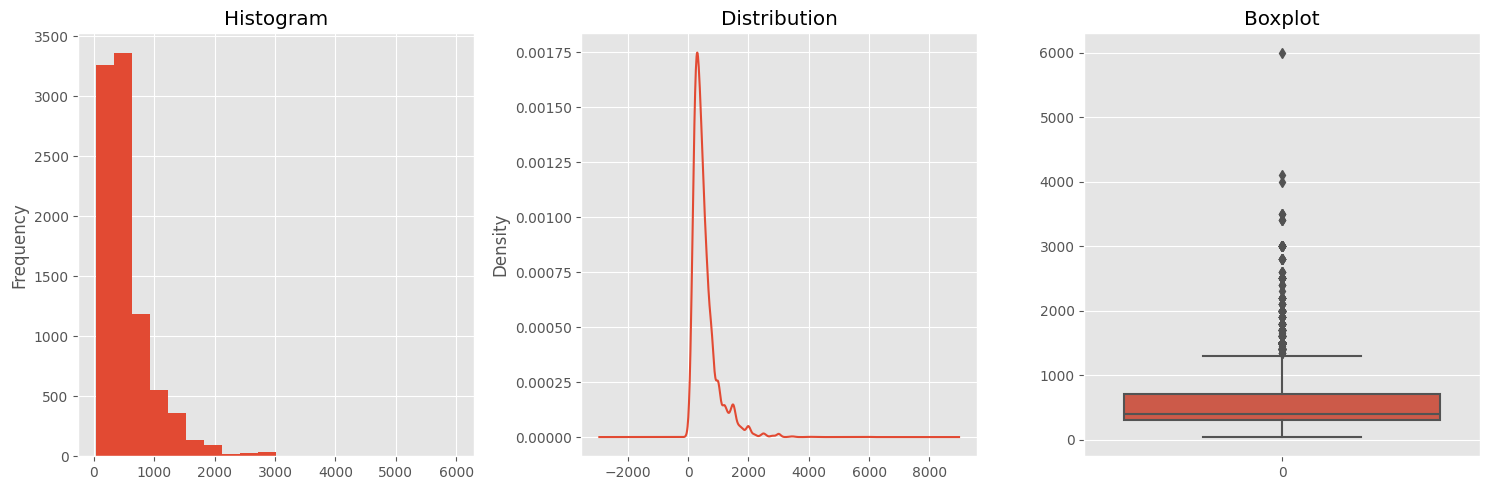

In [79]:
fig, ax = plt.subplots(1, 3, figsize = (15,5))
data['Approx_Cost(for two people)'].plot(kind = 'hist', bins = 20, ax=ax[0], title = 'Histogram')
data['Approx_Cost(for two people)'].plot(kind='kde', ax=ax[1], title = 'Distribution')
sns.boxplot(data['Approx_Cost(for two people)'], ax=ax[2])
ax[2].set_title('Boxplot')
plt.tight_layout()
plt.show()

In [80]:
data[data['Approx_Cost(for two people)'] > 3000]

,ID,URL,Address,Name,Online_Order,Book_Table,Rating (out of 5),Number_of_votes,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),Reviews_List,menu_item,listed_in(type),listed_in(city)
736,37715,https://www.zomato.com/bangalore/la-brasserie-...,"Le Meridien, 28, Sankey Road, Bangalore",La Brasserie - Le Meridien,No,Yes,4.1,309,Sankey Road,Fine Dining,"Pasta, Veg Sushi, Biryani, Lunch Buffet, Waffl...","North Indian, Continental, Japanese, Chinese, ...",4100.0,"[('Rated 5.0', 'RATED\n We were here for thei...",[],Buffet,Lavelle Road
848,37683,https://www.zomato.com/bangalore/the-market-th...,"The Ritz-Carlton, 99, Residency Road, Bangalore",The Market - The Ritz-Carlton,No,Yes,4.3,619,Residency Road,Fine Dining,"Pizza, Waffles, Roti, Pasta, Sushi, Salads, Fish","North Indian, European, Thai",3400.0,"[('Rated 3.0', 'RATED\n Went there for buffet...",[],Buffet,Lavelle Road
6532,43946,https://www.zomato.com/bangalore/the-lantern-r...,"The Ritz-Carlton, 99, Residency Road, Bangalore",The Lantern Restaurant & Bar - The Ritz-Carlto...,No,Yes,4.3,430,Residency Road,"Fine Dining, Bar","Dumplings, Momos, Chenin Blanc, Mapo Tofu, Coc...",Chinese,3500.0,"[('Rated 4.0', 'RATED\n Ã\x83Ã\x83Ã\x82Ã\...",[],Pubs and bars,MG Road
6552,42184,https://www.zomato.com/bangalore/the-market-th...,"The Ritz-Carlton, 99, Residency Road, Bangalore",The Market - The Ritz-Carlton,No,Yes,4.3,620,Residency Road,Fine Dining,"Pizza, Waffles, Roti, Pasta, Sushi, Salads, Fish","North Indian, European, Thai",3400.0,"[('Rated 3.0', 'RATED\n Went there for buffet...",[],Buffet,MG Road
7570,6143,https://www.zomato.com/bangalore/kebabs-kurrie...,"ITC Gardenia, 1, Residency Road, Bangalore",Kebabs & Kurries - ITC Gardenia,No,Yes,4.3,355,Richmond Road,Fine Dining,"Dal Bukhara, Biryani, Fish, Gulab Jamun, Kulfi...","North Indian, Mughlai",3500.0,"[('Rated 5.0', 'RATED\n A luxurious North Ind...",[],Dine-out,Brigade Road
7804,19139,https://www.zomato.com/bangalore/le-cirque-sig...,"The Leela Palace, 23, Old Airport Road, Bangalore",Le Cirque Signature - The Leela Palace,No,Yes,4.3,126,Old Airport Road,Fine Dining,"Wine, Asparagus Soup, Creme Brulee, Pasta, Rav...","French, Italian",6000.0,"[('Rated 5.0', 'RATED\n Awesome would be an u...",[],Dine-out,Indiranagar
7910,43370,https://www.zomato.com/bangalore/the-lantern-r...,"The Ritz-Carlton, 99, Residency Road, Bangalore",The Lantern Restaurant & Bar - The Ritz-Carlto...,No,Yes,4.3,430,Residency Road,"Fine Dining, Bar","Dumplings, Momos, Chenin Blanc, Mapo Tofu, Coc...",Chinese,3500.0,"[('Rated 4.0', 'RATED\n Ã\x83Ã\x83Ã\x82Ã\...",[],Dine-out,MG Road
8300,48112,https://www.zomato.com/bangalore/the-market-th...,"The Ritz-Carlton, 99, Residency Road, Bangalore",The Market - The Ritz-Carlton,No,Yes,4.3,620,Residency Road,Fine Dining,"Pizza, Waffles, Roti, Pasta, Sushi, Salads, Fish","North Indian, European, Thai",3400.0,"[('Rated 3.0', 'RATED\n Went there for buffet...",[],Dine-out,Residency Road
8772,13331,https://www.zomato.com/bangalore/riwaz-the-rit...,"The Ritz-Carlton, 99, Residency Road, Bangalore",Riwaz - The Ritz-Carlton,No,Yes,4.1,270,Residency Road,"Fine Dining, Bar","Tandoori Broccoli, Dal Makhani, Tamatar Ka Sho...",North Indian,4000.0,"[('Rated 4.0', 'RATED\n Great food; ambience ...",[],Pubs and bars,Church Street


#### Although the Approx costs are high, they are not outliers. I have went through the restaurants online and they really were expensive because of extravagant cuisines offered by them. 

#### Let's check what the 'Rest_Type' distribution is for the rows which are missing values under this column

In [81]:
data[data['Approx_Cost(for two people)'].isna()][['Rest_Type','dish_liked','Cuisines','menu_item']]['Rest_Type'].value_counts()

Rest_Type
Quick Bites                    16
Casual Dining                   9
Cafe                            5
Delivery                        3
Casual Dining, Bar              3
Takeaway, Delivery              3
Takeaway                        2
Bar, Casual Dining              2
Casual Dining, Cafe             2
Dessert Parlor                  2
Casual Dining, Microbrewery     2
Bakery, Quick Bites             1
Food Court                      1
Name: count, dtype: int64

#### Looking into top 3 most frequent restaurant types

In [82]:
d1 = data[data['Rest_Type'].isin(['Quick Bites','Casual Dining','Cafe'])]
d1

,ID,URL,Address,Name,Online_Order,Book_Table,Rating (out of 5),Number_of_votes,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),Reviews_List,menu_item,listed_in(type),listed_in(city)
0,14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2,7,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500.0,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City
3,51635,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",Thai & Chinese Fast Food,No,No,3.4,7,KR Puram,Quick Bites,NaN,"Chinese, Thai",400.0,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
4,23424,https://www.zomato.com/bangalore/grill-on-whee...,"Kothanuru Main Road, Puttenahalli Road, Natara...",Grill On Wheels,No,No,NEW,0,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400.0,[],[],Dine-out,JP Nagar
7,35354,https://www.zomato.com/bangalore/bombay-talkie...,"10A 38th Cross Road 5th Block, Jayanagar, Bang...",Bombay Talkies,Yes,No,3.6,24,Jayanagar,Quick Bites,NaN,"Maharashtrian, Fast Food, Street Food, Sandwich",200.0,"[('Rated 2.0', 'RATED\n Visited this place to...","['Paneer Tikka Frankie', 'Misal Pav', 'Aloo Pa...",Delivery,Koramangala 7th Block
8,29058,https://www.zomato.com/bangalore/cafe-58-btm-b...,"5, 1st Main Road, Buvannapa Layout, Kaveri Lay...",Cafe 58,No,No,3.4,4,BTM,Quick Bites,NaN,"Fast Food, Biryani",200.0,"[('Rated 4.0', 'RATED\n Small mallu managed c...",[],Dine-out,Koramangala 4th Block
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9080,40223,https://www.zomato.com/bangalore/sai-cafe-veg-...,"10th Cross, 2nd Temple Road, Malleswaram, Mall...",Sai Cafe Veg,No,No,3.5,11,Malleshwaram,Quick Bites,NaN,Fast Food,250.0,"[('Rated 3.0', 'RATED\n Inspired by the no co...",[],Dine-out,Malleshwaram
9083,39718,https://www.zomato.com/bangalore/food-square-m...,"Big Bazaar, Linking Road, Malleshwaram, Bangalore",Food Square,Yes,No,3.2,4,Malleshwaram,Quick Bites,NaN,"Chinese, Street Food, Rolls",250.0,"[('Rated 1.0', 'RATED\n Not cooked properly')...","['Gobhi Manchurian', 'Veg Fried Rice', 'Veg No...",Delivery,Malleshwaram
9086,47608,https://www.zomato.com/bangalore/caf%C3%A9-mor...,"Le Parc Richmonde Building, Shantala nagar, Ri...",Cafe Mor'ish,Yes,No,4.1,119,Richmond Road,Cafe,"Coffee, Pizza, Pasta, Burgers, Tomato Soup, Eg...","BBQ, Continental, Burger, Wraps, Pizza, Cafe",700.0,"[('Rated 3.0', 'RATED\n Ã\x83Ã\x83Ã\x82Ã\...","['Cafe Morish Veggie Pizza', 'Meat Cravers Piz...",Delivery,Residency Road
9089,35621,https://www.zomato.com/bangalore/tawa-sagara-j...,"29/1, 30th Cross, 4th T Block, Thilknagar, Jay...",Tawa Sagara,No,No,3.8,122,Jayanagar,Casual Dining,"Sea Food, Biryani, Fish Thali, Neer Dosa, Murg...","Mangalorean, Seafood",NaN,"[('Rated 1.0', 'RATED\n We orders chicken suk...",[],Delivery,Koramangala 7th Block


In [83]:
d2 = d1[d1['Approx_Cost(for two people)'].isna() == False]
d2

,ID,URL,Address,Name,Online_Order,Book_Table,Rating (out of 5),Number_of_votes,Location,Rest_Type,dish_liked,Cuisines,Approx_Cost(for two people),Reviews_List,menu_item,listed_in(type),listed_in(city)
0,14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2,7,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500.0,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City
3,51635,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",Thai & Chinese Fast Food,No,No,3.4,7,KR Puram,Quick Bites,NaN,"Chinese, Thai",400.0,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
4,23424,https://www.zomato.com/bangalore/grill-on-whee...,"Kothanuru Main Road, Puttenahalli Road, Natara...",Grill On Wheels,No,No,NEW,0,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400.0,[],[],Dine-out,JP Nagar
7,35354,https://www.zomato.com/bangalore/bombay-talkie...,"10A 38th Cross Road 5th Block, Jayanagar, Bang...",Bombay Talkies,Yes,No,3.6,24,Jayanagar,Quick Bites,NaN,"Maharashtrian, Fast Food, Street Food, Sandwich",200.0,"[('Rated 2.0', 'RATED\n Visited this place to...","['Paneer Tikka Frankie', 'Misal Pav', 'Aloo Pa...",Delivery,Koramangala 7th Block
8,29058,https://www.zomato.com/bangalore/cafe-58-btm-b...,"5, 1st Main Road, Buvannapa Layout, Kaveri Lay...",Cafe 58,No,No,3.4,4,BTM,Quick Bites,NaN,"Fast Food, Biryani",200.0,"[('Rated 4.0', 'RATED\n Small mallu managed c...",[],Dine-out,Koramangala 4th Block
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9079,33471,https://www.zomato.com/bangalore/cafe-hush-btm...,"142, 8th Cross Road, Venkateshwara Layout, SG ...",Cafe Hush,No,No,3.6,22,BTM,Cafe,NaN,"Cafe, Fast Food",500.0,"[('Rated 3.0', 'RATED\n The bread for the bur...",[],Delivery,Koramangala 6th Block
9080,40223,https://www.zomato.com/bangalore/sai-cafe-veg-...,"10th Cross, 2nd Temple Road, Malleswaram, Mall...",Sai Cafe Veg,No,No,3.5,11,Malleshwaram,Quick Bites,NaN,Fast Food,250.0,"[('Rated 3.0', 'RATED\n Inspired by the no co...",[],Dine-out,Malleshwaram
9083,39718,https://www.zomato.com/bangalore/food-square-m...,"Big Bazaar, Linking Road, Malleshwaram, Bangalore",Food Square,Yes,No,3.2,4,Malleshwaram,Quick Bites,NaN,"Chinese, Street Food, Rolls",250.0,"[('Rated 1.0', 'RATED\n Not cooked properly')...","['Gobhi Manchurian', 'Veg Fried Rice', 'Veg No...",Delivery,Malleshwaram
9086,47608,https://www.zomato.com/bangalore/caf%C3%A9-mor...,"Le Parc Richmonde Building, Shantala nagar, Ri...",Cafe Mor'ish,Yes,No,4.1,119,Richmond Road,Cafe,"Coffee, Pizza, Pasta, Burgers, Tomato Soup, Eg...","BBQ, Continental, Burger, Wraps, Pizza, Cafe",700.0,"[('Rated 3.0', 'RATED\n Ã\x83Ã\x83Ã\x82Ã\...","['Cafe Morish Veggie Pizza', 'Meat Cravers Piz...",Delivery,Residency Road


In [84]:
d2['Approx_Cost(for two people)'].describe()

count    5744.000000
mean      500.384749
std       314.280366
min        40.000000
25%       300.000000
50%       400.000000
75%       600.000000
max      2500.000000
Name: Approx_Cost(for two people), dtype: float64

#### We got the median for the whole data as 400 and for selected specific Rest_Type (i.e., Quick Bites, Casual Dining, Cafe) also we got median as 400. So I have decided to replace the missing values with 400.

In [85]:
data['Approx_Cost(for two people)'].fillna(data['Approx_Cost(for two people)'].median(), inplace=True)

In [86]:
data['Approx_Cost(for two people)'].isna().sum()

0

In [87]:
data['Approx_Cost(for two people)'] = data['Approx_Cost(for two people)'].astype('int64')

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           9091 non-null   int64 
 1   URL                          9091 non-null   object
 2   Address                      9091 non-null   object
 3   Name                         9091 non-null   object
 4   Online_Order                 9091 non-null   object
 5   Book_Table                   9091 non-null   object
 6   Rating (out of 5)            9091 non-null   object
 7   Number_of_votes              9091 non-null   int64 
 8   Location                     9091 non-null   object
 9   Rest_Type                    9047 non-null   object
 10  dish_liked                   4224 non-null   object
 11  Cuisines                     9091 non-null   object
 12  Approx_Cost(for two people)  9091 non-null   int64 
 13  Reviews_List                 9091

---

### 14th, 15th column - Review_List and Menu_Items

In [89]:
data[['Reviews_List','menu_item']]

,Reviews_List,menu_item
0,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[]
1,"[('Rated 1.0', 'RATED\n Expected a good night...",[]
2,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",[]
3,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[]
4,[],[]
...,...,...
9086,"[('Rated 3.0', 'RATED\n Ã\x83Ã\x83Ã\x82Ã\...","['Cafe Morish Veggie Pizza', 'Meat Cravers Piz..."
9087,"[('Rated 2.0', ""RATED\n So I ordered the egg ...",[]
9088,"[('Rated 2.0', 'RATED\n The high rating on Zo...",[]
9089,"[('Rated 1.0', 'RATED\n We orders chicken suk...",[]


In [90]:
data.drop(columns=['Reviews_List','menu_item'], axis=1, inplace=True)

#### Dropping these columns altogether as these have so many inconsistencies and have no relevance to analysis further.

---

### 16th and 17th column - listed_in type, city

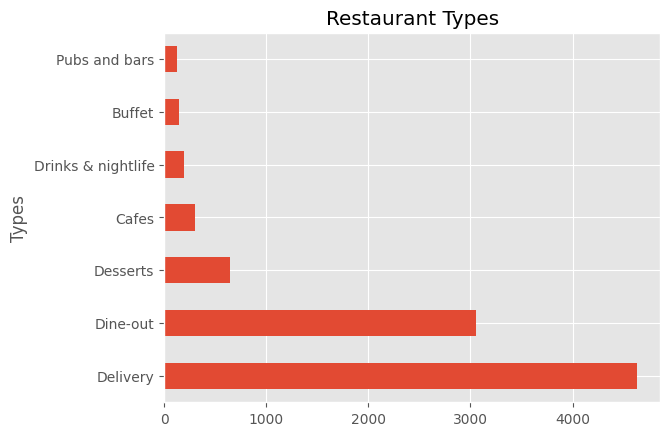

In [91]:
data['listed_in(type)'].value_counts().plot(kind='barh', title='Restaurant Types', ylabel='Types')
plt.show()

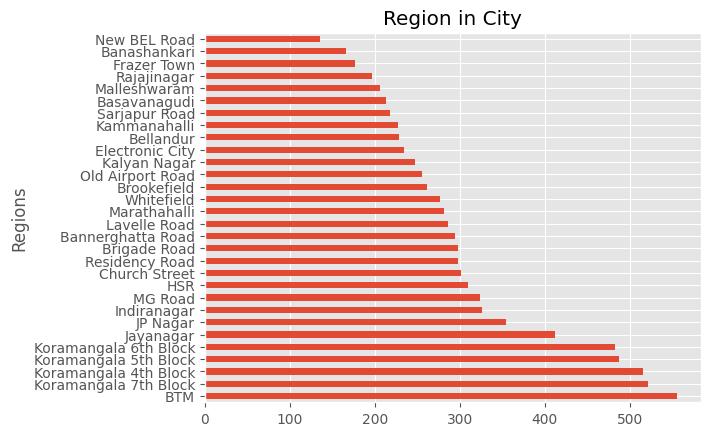

In [92]:
data['listed_in(city)'].value_counts().plot(kind='barh', title='Region in City', ylabel='Regions')
plt.show()

#### Data is intact in these columns

---

#### One column which I wanted to deal with later was 'dish_liked' column

In [93]:
data['dish_liked'].isna().sum()

4867

#### Although there a so many missing values in this column, keeping this column because there are some specific dishes mentioned for some restaurants. It might be useful.

#### The final metadata of columns is as follows

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           9091 non-null   int64 
 1   URL                          9091 non-null   object
 2   Address                      9091 non-null   object
 3   Name                         9091 non-null   object
 4   Online_Order                 9091 non-null   object
 5   Book_Table                   9091 non-null   object
 6   Rating (out of 5)            9091 non-null   object
 7   Number_of_votes              9091 non-null   int64 
 8   Location                     9091 non-null   object
 9   Rest_Type                    9047 non-null   object
 10  dish_liked                   4224 non-null   object
 11  Cuisines                     9091 non-null   object
 12  Approx_Cost(for two people)  9091 non-null   int64 
 13  listed_in(type)              9091

#### Removing URL, Address columns.

In [95]:
data.drop(columns=['URL','Address'], axis=1, inplace=True)

#### Generating Profile of final DataFrame

In [96]:
profile = ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

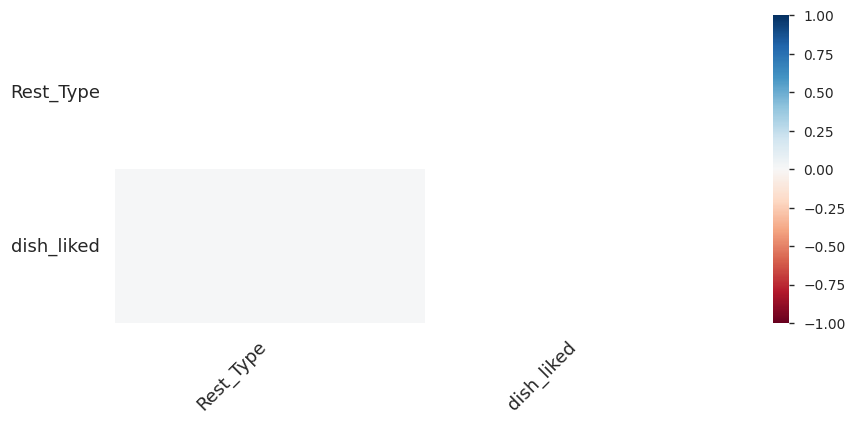

In [97]:
profile.to_file("Cleaned_Data_report.html")

#### Converting the cleaned dataframe back to excel. I will be using that cleaned dataset for analysis.

In [98]:
data.to_excel('Zomato_Cleaned.xlsx', index=False)